# 概率

## 基本概率论

假设掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。
如果骰子是公平的，那么所有六个结果$\{1, \ldots, 6\}$都有相同的可能发生，
因此我们可以说$1$发生的概率为$\frac{1}{6}$。

对于每个骰子，我们将观察到$\{1, \ldots, 6\}$中的一个值。
对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数，即此事件（event）概率的估计值。
大数定律（law of large numbers）告诉我们：随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。
笼统来说，可以把分布（distribution）看作对事件的概率分配，将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。
输出是另一个相同长度的向量：它在索引$i$处的值是采样结果中$i$出现的次数。

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。
如果用Python的for循环来完成这个任务，速度会慢得惊人。
因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [2]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 2., 2., 1., 3., 0.])

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。
然后，我们可以统计1000次投掷后，每个数字被投中了多少次。
具体来说，我们计算相对频率，以作为真实概率的估计。

In [3]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1790, 0.1820, 0.1750, 0.1610, 0.1540, 0.1490])

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率$\frac{1}{6}$，大约是$0.167$，所以上面输出的估计值看起来不错。

我们也可以看到这些概率如何随着时间的推移收敛到真实概率，让我们进行500组实验，每组抽取10个样本。

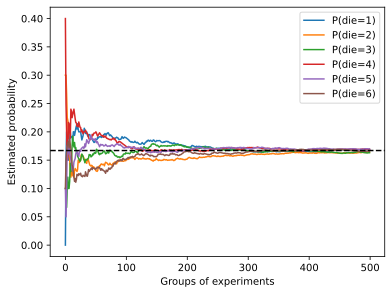

In [4]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();